In [70]:
import numpy as np
from sklearn.decomposition import NMF
import scipy
import matplotlib.pyplot as plt

In [71]:
N=100
M=50
np.random.seed(34)
A = np.random.rand(N*M).reshape((N,M))

In [72]:
xin=np.random.rand(M)

In [73]:
b=np.dot(A,xin)

In [74]:
x0=np.random.rand(M)

# PGD

In [75]:
Q=ATA=np.dot(A.T,A)
L=np.sqrt(np.sum(Q**2))
t=1/L
p=np.dot(A.T,b)


In [90]:
x=np.copy(x0)
xa=[]
for i in range(0,5000):
    x=(x-t*(np.dot(Q,x)-p))
    x[x<0]=0
    xa.append(x)
    if np.mod(i,1000)==0:
        print(np.sum((b-np.dot(A,x))**2))

83.69154002747248
0.1308720004812566
0.015007051287642131
0.0023603903121800166
0.0004105736525366294


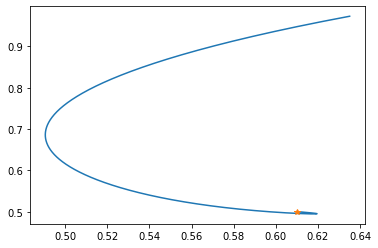

In [91]:
xa=np.array(xa)
plt.plot(xa.T[0],xa.T[1])
plt.plot([xin[0]],[xin[1]],"*")

# PGD compact form

In [78]:
Q=ATA=np.dot(A.T,A)
n=np.shape(Q)[0]
norm=np.sqrt(np.sum(Q**2))
Ieye = np.eye(n)
Theta1 = Ieye - Q/norm
Theta2 = np.dot(A.T,b)/norm

In [92]:
x=np.copy(x0)
resPGD=[]
for i in range(0,5000):
    x=np.dot(Theta1,x) + Theta2
    x[x<0]=0
    resPGD.append(np.sum((b-np.dot(A,x))**2))

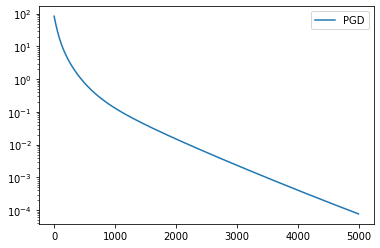

In [93]:
plt.plot(resPGD,label="PGD")
plt.yscale("log")
plt.legend()

# PGD+Nesterov Acceleration

In [85]:
Q=ATA=np.dot(A.T,A)
n=np.shape(Q)[0]
norm=np.sqrt(np.sum(Q**2))
Ieye = np.eye(n)
Theta1 = Ieye - Q/norm
Theta2 = np.dot(A.T,b)/norm

In [94]:
x=np.copy(x0)
y=np.copy(x0)
alpha=1
resPGDN=[]
for i in range(0,5000):
    xp=np.copy(x)
    x=np.dot(Theta1,y) + Theta2
    x[x<0]=0 
    aa=alpha*alpha
    fac=alpha*(1.0-alpha)
    alpha=(np.sqrt(aa*aa+4*aa)-aa)/2
    beta=fac/(aa+alpha)
    y=x+beta*(x-xp)

    resPGDN.append(np.sum((b-np.dot(A,x))**2))

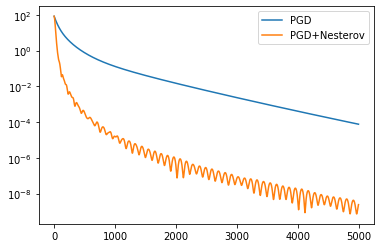

In [95]:
plt.plot(resPGD,label="PGD")
plt.plot(resPGDN,label="PGD+Nesterov")
plt.yscale("log")
plt.legend()

# APGD (Nesterov + restart)

In [123]:
Q=ATA=np.dot(A.T,A)
n=np.shape(Q)[0]
norm=np.sqrt(np.sum(Q**2))
Ieye = np.eye(n)
Theta1 = Ieye - Q/norm
Theta2 = np.dot(A.T,b)/norm

In [124]:
x=np.copy(x0)
y=np.copy(x0)
alpha0=1
alpha=alpha0
resAPGD=[]
res=np.sum((b-np.dot(A,x))**2)
for i in range(0,5000):
    xp=np.copy(x)
    x=np.dot(Theta1,y) + Theta2
    x[x<0]=0 
 
    #RESTART
    res_update=np.sum((b-np.dot(A,x))**2)  
    if res_update > res:
        x=np.dot(Theta1,xp) + Theta2
        x[x<0]=0
        alpha=alpha0
        y=np.copy(x)
        res=np.sum((b-np.dot(A,x))**2) 
    else:
        aa=alpha*alpha
        fac=alpha*(1.0-alpha)
        alpha=(np.sqrt(aa*aa+4*aa)-aa)/2
        beta=fac/(aa+alpha)
        y=x+beta*(x-xp) 
        res=res_update

    resAPGD.append(res)

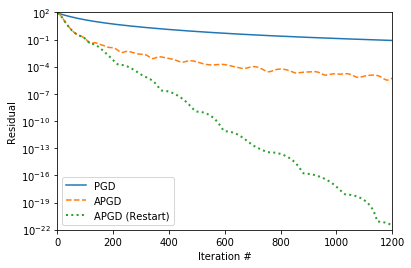

In [125]:
plt.plot(resPGD,label="PGD")
plt.plot(resPGDN,label="APGD",ls="dashed")
plt.plot(resAPGD,label="APGD (Restart)",ls="dotted",lw=2)
plt.yscale("log")
plt.xlim(0,1200)
plt.ylim(1.e-22,100)
plt.xlabel("Iteration #")
plt.ylabel("Residual")
plt.legend()
plt.savefig("NNLS.pdf", bbox_inches="tight", pad_inches=0.0)

# APGD Tseng's beta

In [134]:
Q=ATA=np.dot(A.T,A)
n=np.shape(Q)[0]
norm=np.sqrt(np.sum(Q**2))
Ieye = np.eye(n)
Theta1 = Ieye - Q/norm
Theta2 = np.dot(A.T,b)/norm
w,l=np.linalg.eig(Q)
kappa=np.min(w)/np.max(w)
beta=(1-np.sqrt(kappa))/(1+np.sqrt(kappa))

In [135]:
np.max(w)/np.min(w)

1560.9954119202282

In [140]:
x=np.copy(x0)
y=np.copy(x0)
resAPGDb=[]
res=np.sum((b-np.dot(A,x))**2)
for i in range(0,5000):
    xp=np.copy(x)
    x=np.dot(Theta1,y) + Theta2
    x[x<0]=0 
    y=x+beta*(x-xp) 
    res=np.sum((b-np.dot(A,x))**2)
    resAPGDb.append(res)

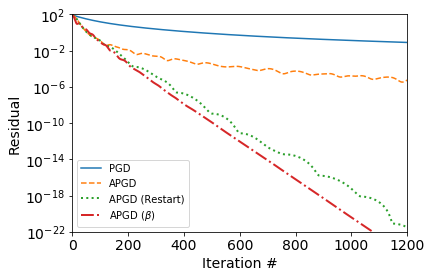

In [150]:
plt.plot(resPGD,label="PGD")
plt.plot(resPGDN,label="APGD",ls="dashed")
plt.plot(resAPGD,label="APGD (Restart)",ls="dotted",lw=2)
plt.plot(resAPGDb,label="APGD ($\\beta$)",ls="dashdot",lw=2)
plt.yscale("log")
plt.xlim(0,1200)
plt.ylim(1.e-22,100)
plt.xlabel("Iteration #",fontsize=14)
plt.ylabel("Residual",fontsize=14)
plt.legend()
plt.tick_params(labelsize=14)
plt.savefig("NNLS.pdf", bbox_inches="tight", pad_inches=0.0)